# 04 시각화

In [30]:
# 80명 학생들의 키
heights = read.csv('csv/height.csv')
str(heights)

'data.frame':	80 obs. of  1 variable:
 $ height: int  151 154 160 160 163 156 158 156 154 160 ...


In [31]:
summary(heights)

     height     
 Min.   :143.0  
 1st Qu.:154.0  
 Median :157.5  
 Mean   :157.6  
 3rd Qu.:161.2  
 Max.   :169.0  

In [32]:
head(heights)

,height
,<int>
1,151
2,154
3,160
4,160
5,163
6,156


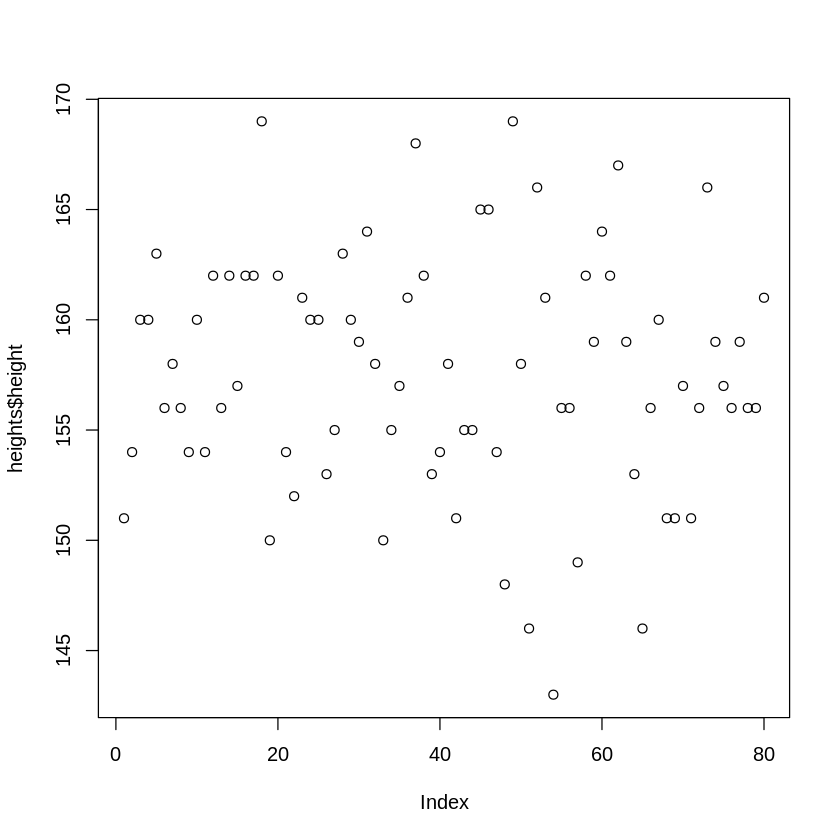

In [33]:
plot(heights$height)

## 도수분포표
* 단순한 숫자의 나열인 데이터 자체로는 어떠한 정보도 알 수 없음
* 80명의 학생의 키를 정리한 데이터에서 무엇을 알 수 있을까?
* 각 학생들의 키는 모두 같지않고 제각각의 숫자로 나타남
    + 다양한 수치로 나타나는 것을 **분포**한다라고 함

* 분포가 생기는 이유는 어떤 불확실성(!)이 있기 때문
* 이러한 불확실성이 제각각인 키의 수치를 발생시킨다고 여김
* 하지만, 이러한 수치들에도 **고유한 특징**이나 **반복(패턴)** 되는 것이 존재
* 분포의 특성을 도출하기 위해 (확률에 근거한) **통계**라는 도구 사용
* 분포화된 자료를 시각화하려면 히스토그램을 그려야 함

## 히스토그램을 그리는 방법
* 도수분포표를 작성해야 함
    + 최대/최소값
    + 계급 class 설정 - **구간**
    + **계급값** 설정
    + 계급내 데이터수 파악 - **빈도/도수** frequency
    + 각 계급 빈도의 상대비율 - **상대도수**
    + 각 계급의 누적합 - **누적도수**
* 히스토그램을 통해 데이터의 분포(어떻게 모여 있는지) 파악 가능

In [34]:
# 범위 파악 : xlim
height <- heights$height
mx <- max(height)
mn <- min(height)
range <- mx - mn

sprintf('%d %d %d', mx, mn, range)
# 실제범위 : 169, 143
# 구간범위 : 140 ~ 170

[1] "169 143 26"

In [35]:
# 구간 breaks설정
bmax = as.integer(mx / 10) * 10 + 10   # 구간 최대값
bmin = as.integer(mn / 10) * 10        # 구간 최소값

sprintf('%d %d', bmin, bmax)

[1] "140 170"

In [36]:
# 계급값 설정 - 구간을 대표하는 기준값
bins = seq(140,170,5)
bins     # 140 145 150 155 160 165 170

[1] 140 145 150 155 160 165 170

In [37]:
mid = (bins[2] - bins[1]) / 2
mdbins = bins + mid
mdbins   # 142.5 147.5 152.5 157.5 162.5 167.5 172.5

[1] 142.5 147.5 152.5 157.5 162.5 167.5 172.5

[1]  1  6 19 30 18  6

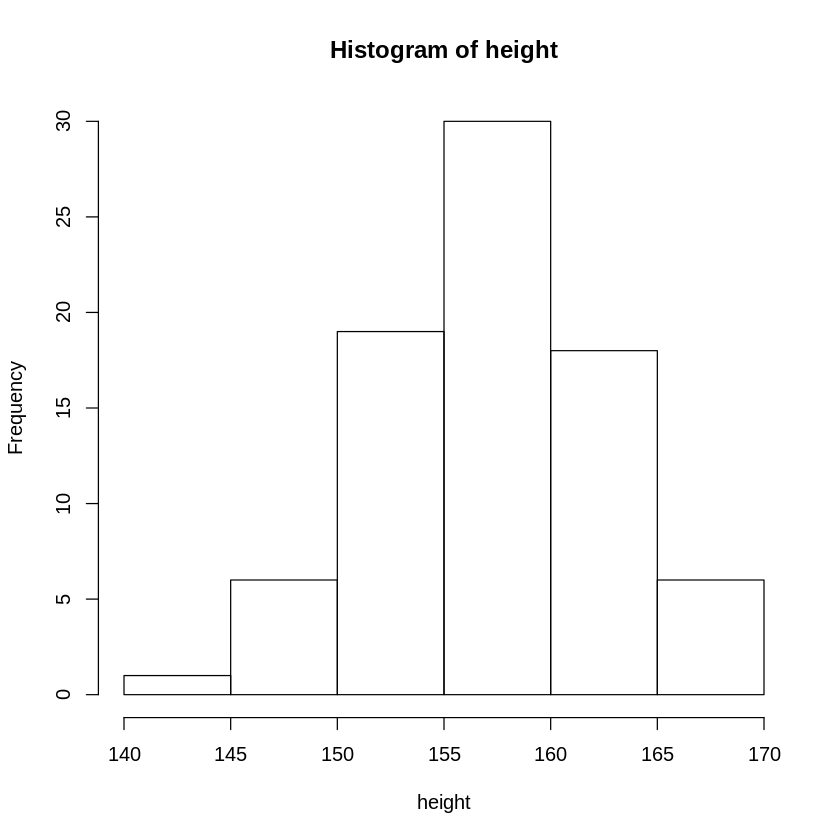

In [38]:
# 구간내 빈도계산
h <- hist(height, breaks=bins)
h$counts     # 빈도수 : 1 6 19 30 18 6

In [39]:
# 상대도수 : 구간별빈도/전체빈도수
total = length(height)   # 전체빈도수 = 전체수 = 80
relfrq = h$counts / total
relfrq

[1] 0.0125 0.0750 0.2375 0.3750 0.2250 0.0750

In [40]:
sum(relfrq)   # 상대도수의 총합은 1

[1] 1

In [41]:
# 누적도수 : 각 구간별 빈도 누적합
# 누적합 : cumsum(객체)
csfrq <- cumsum(h$counts)
csfrq

[1]  1  7 26 56 74 80

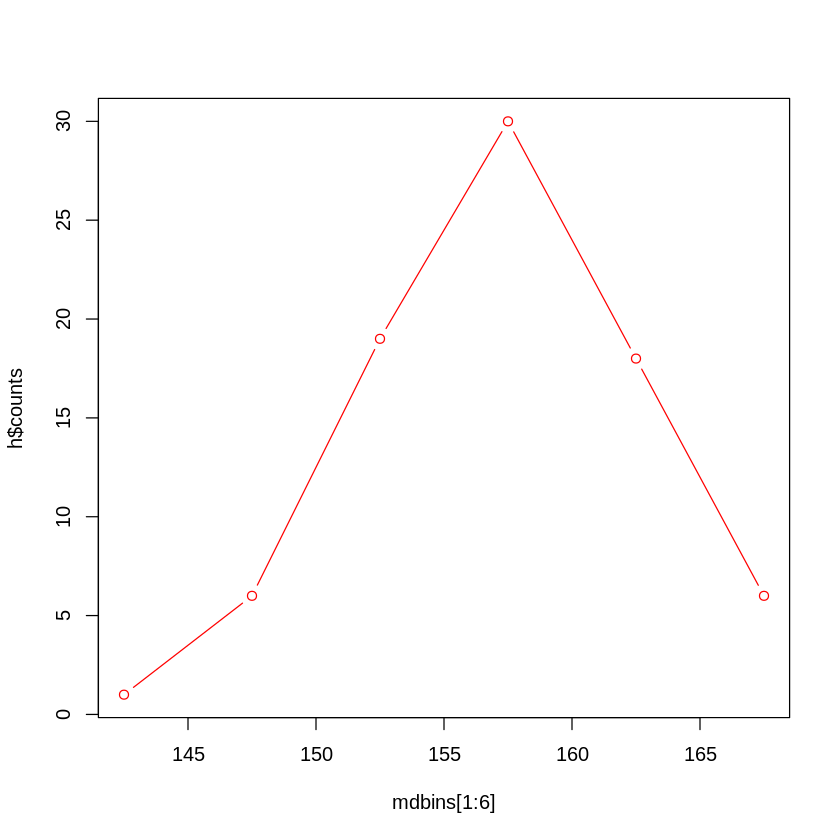

In [42]:
# 계급값 시각화
plot(mdbins[1:6], h$counts, type='b', col='red')

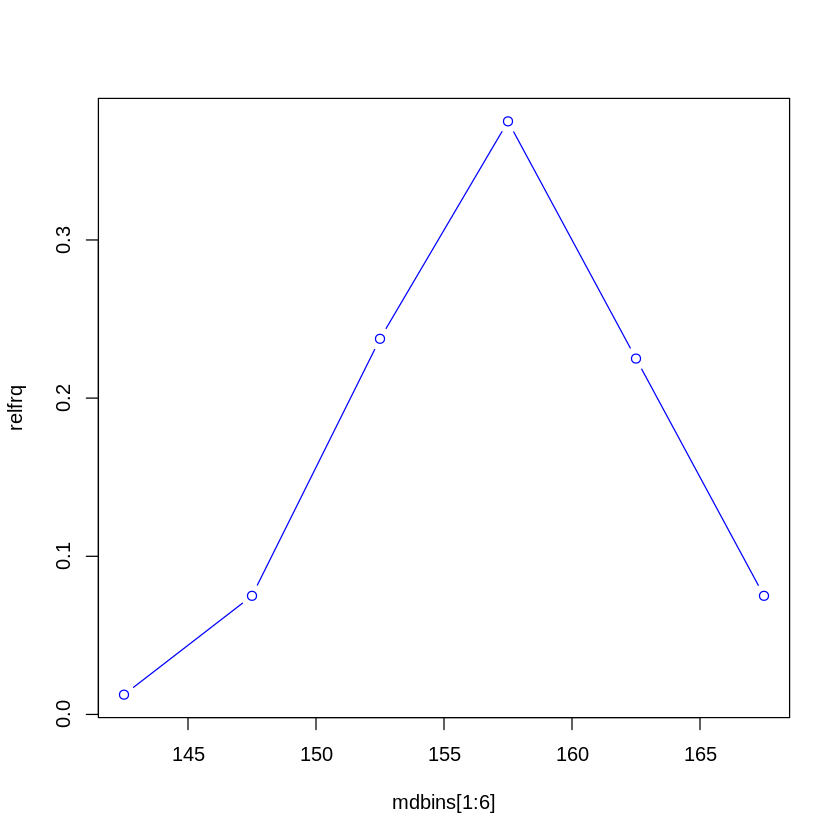

In [43]:
# 상대도수 시각화
plot(mdbins[1:6], relfrq, type='b', col='blue')

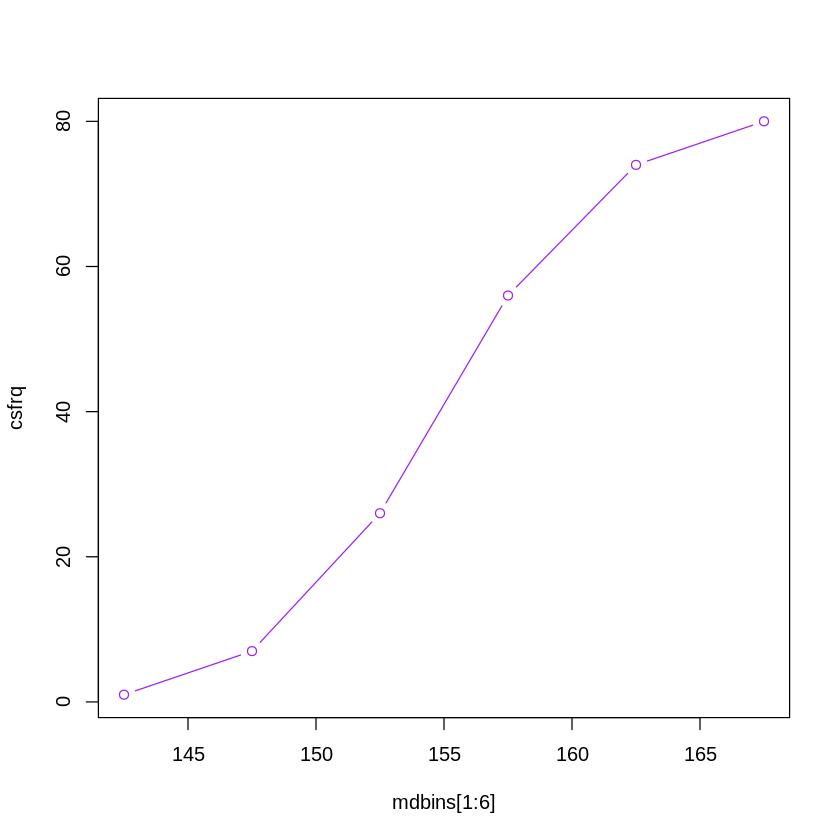

In [44]:
# 누적도수 시각화
plot(mdbins[1:6], csfrq, type='b', col='purple')

## 확률밀도 추정KDE 그래프
+ kernal density estimatiion
+ 관측된 데이터들의 분포로부터 원래 변수의 확률분포특성을 추정
+ 즉, 해당변수에서 관측된 몇가지 데이터로부터 변수가 가질 수 있는 <br> 모든 값들에 대한 밀도(확률)을 추정하는 것을 의미
    - ex) 수능을 위해 모의고사를 실시하는 경우
    - 모의고사를 통해 실제 수능시험의 성적 예측 가능
    - 즉, 몇 회의 모의고사 성적에 대한 분포를 토대로
    - 실제 수능시험을 통해 받을 성적에 대한 확률을 유추할 수 있음

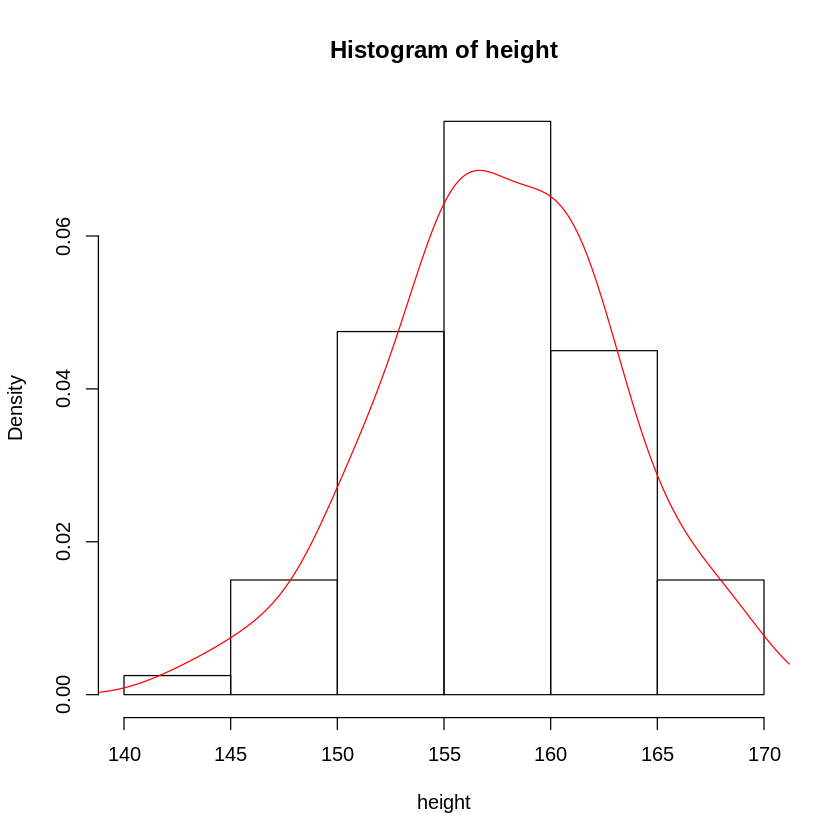

In [45]:
# 확률밀도 시각화
hist(height, freq=F)
lines(density(height), col='red')

In [46]:
# 조선조 왕들 수명의 분포 확인
kings <- c(73,62,45,53,38,16,51,28,37,30,56,30,33,
           56,66,54,40,33,59,36,82,48,44,22,32,67,52)

In [47]:
summary(kings)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  16.00   33.00   45.00   46.04   56.00   82.00 

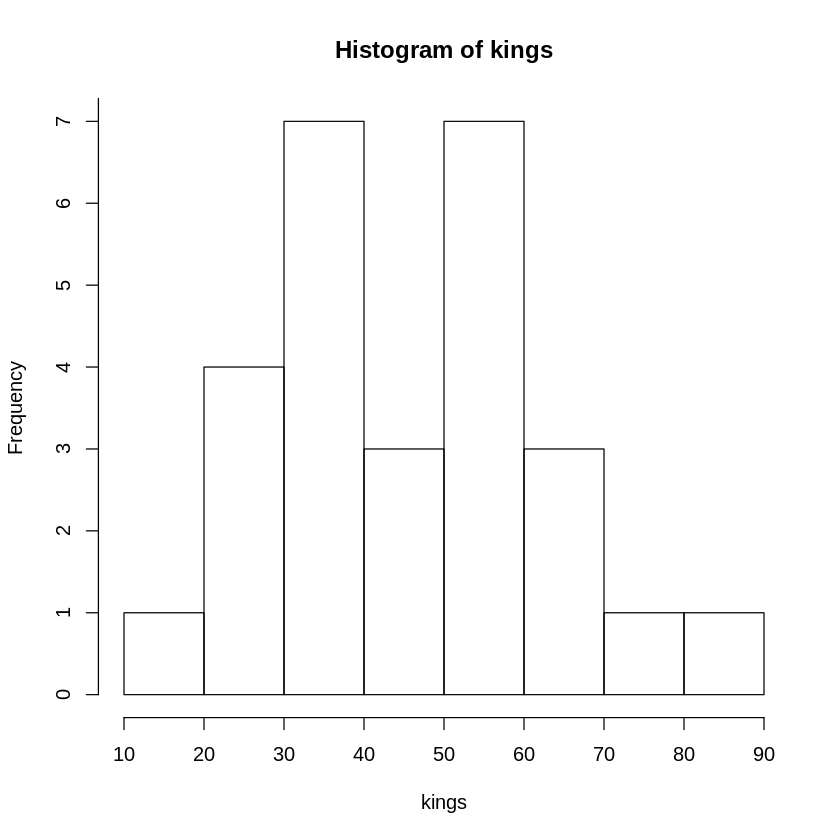

In [48]:
hist(kings, axes=F)
axis(side=1, at=seq(10,90,10))
axis(side=2, at=seq(0,10))

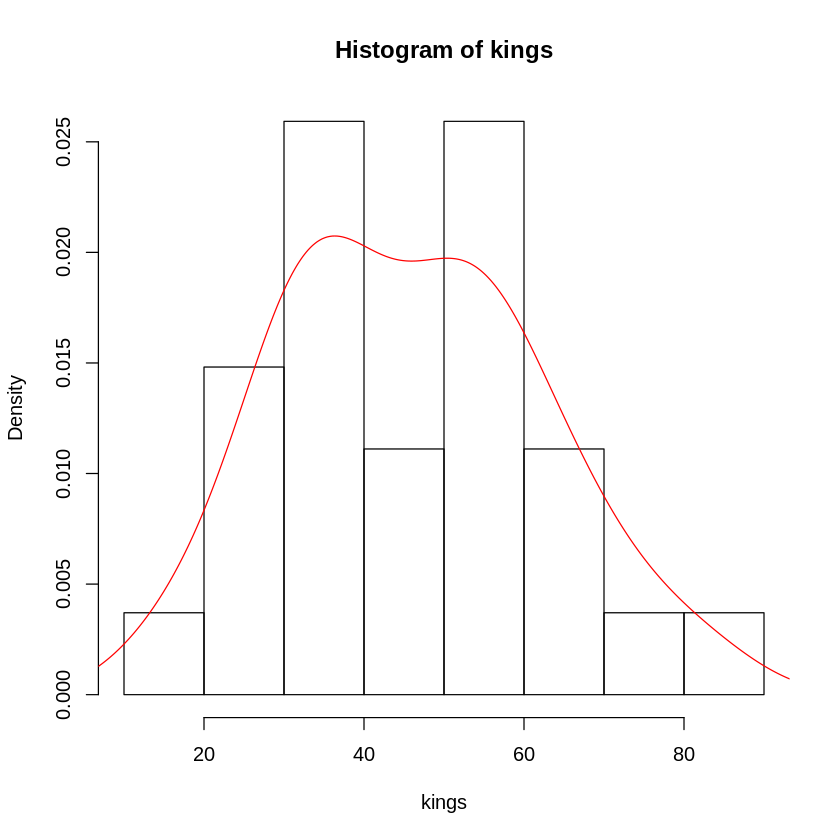

In [49]:
# KDE
# hist(kings, freq=F)
hist(kings, probability=T)
lines(density(kings), col='red')

In [50]:
# 청소년 핸드폰 사용시간에 대한 히스토그램과 확률분포곡선KDE를 작성하세요
phone <- c(10,37,22,32,18,15,15,18,22,15,20,25,38,
           28,25,30,20,22,18,22,22,12,22,26,22,32,
           22,23,20,23,23,20,25,51,20,25,26,22,26,
           28,28,20,23,30,12,22,35,11,20,25)

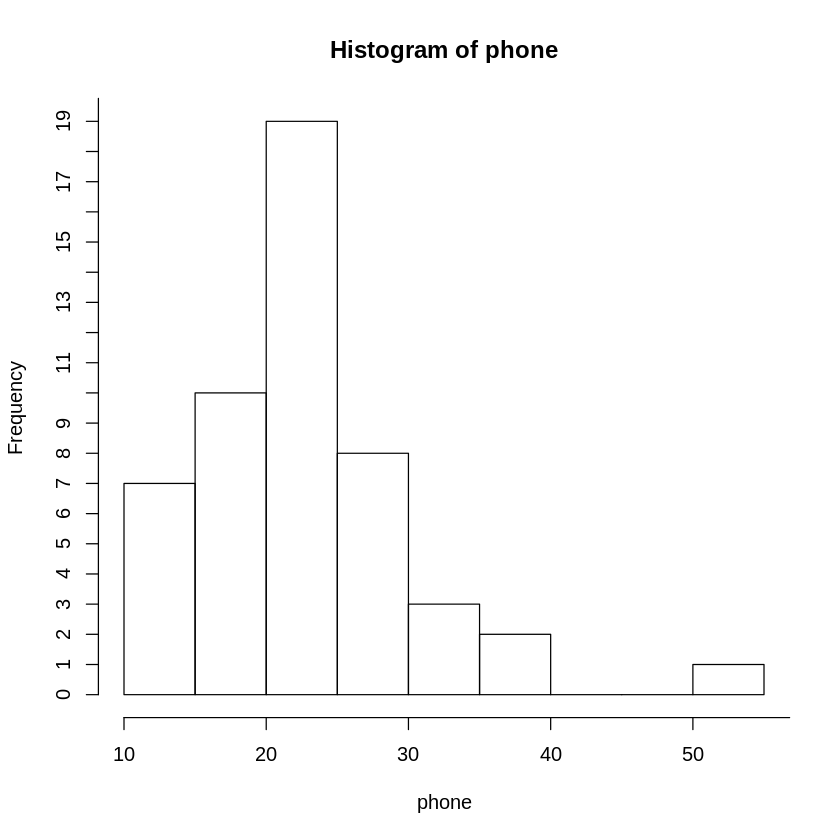

In [51]:
hist(phone, axes=F)
axis(side=1, at=seq(10,60,10))
axis(side=2, at=seq(0,20))

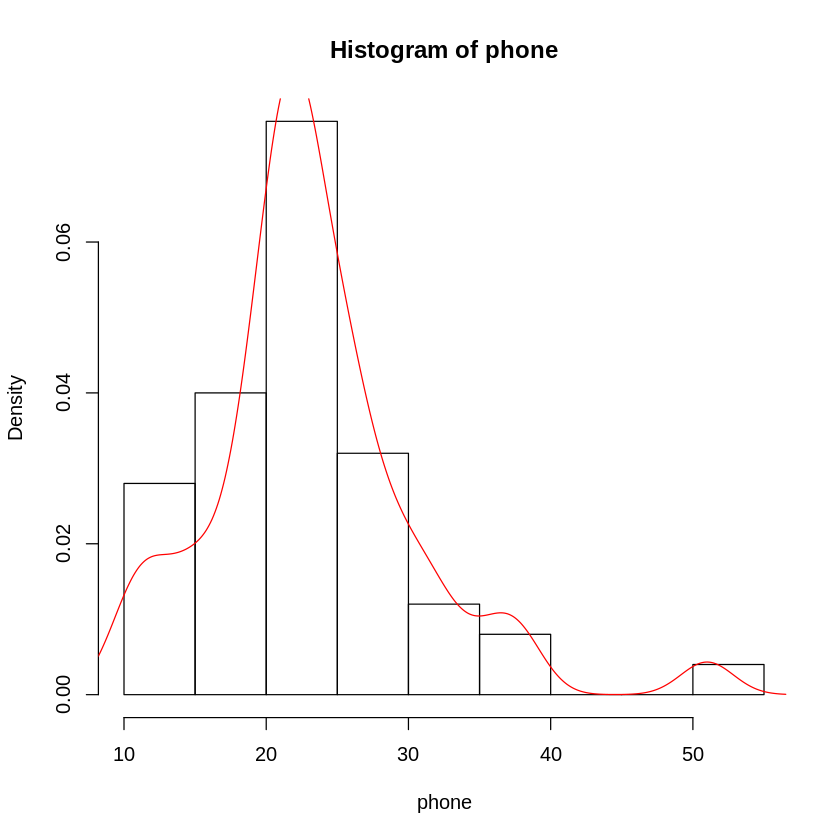

In [52]:
# KDE
# hist(phone, freq=F)
hist(phone, probability=T)
lines(density(phone), col='red')

## 히스토그램 더 잘 다루기
+ hist(대상, 구간정보, 옵션)

In [53]:
# 학생 10명의 키 데이터
heights <- c(170,165,182,156,142,165,159,147,175,172)

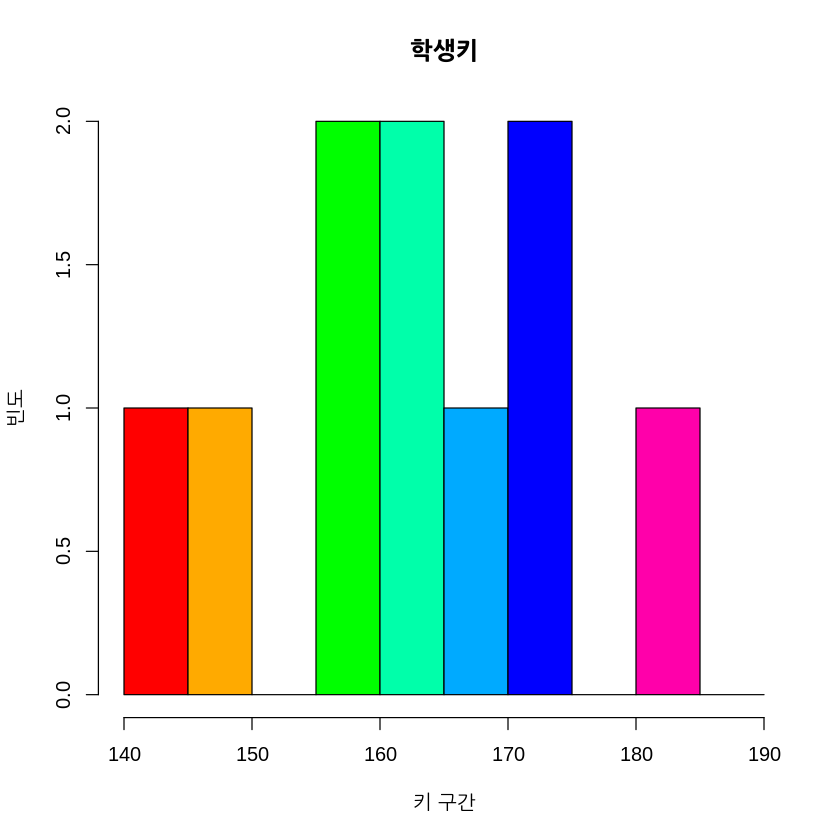

In [54]:
# 색상지정 - colormap
# 구글에서 'matplotlib colormap'를 검색
# R에서 제공하는 xolormap : rainbow, heat.colors
# cm.colors, topo.colors, terrain.colors
hist(heights, breaks=seq(140,190,5),
     main='학생키', xlab='키 구간', ylab='빈도',
    col=rainbow(9))

$breaks
 [1] 140 145 150 155 160 165 170 175 180 185 190

$counts
 [1] 1 1 0 2 2 1 2 0 1 0

$density
 [1] 0.02 0.02 0.00 0.04 0.04 0.02 0.04 0.00 0.02 0.00

$mids
 [1] 142.5 147.5 152.5 157.5 162.5 167.5 172.5 177.5 182.5 187.5

$xname
[1] "heights"

$equidist
[1] TRUE

attr(,"class")
[1] "histogram"

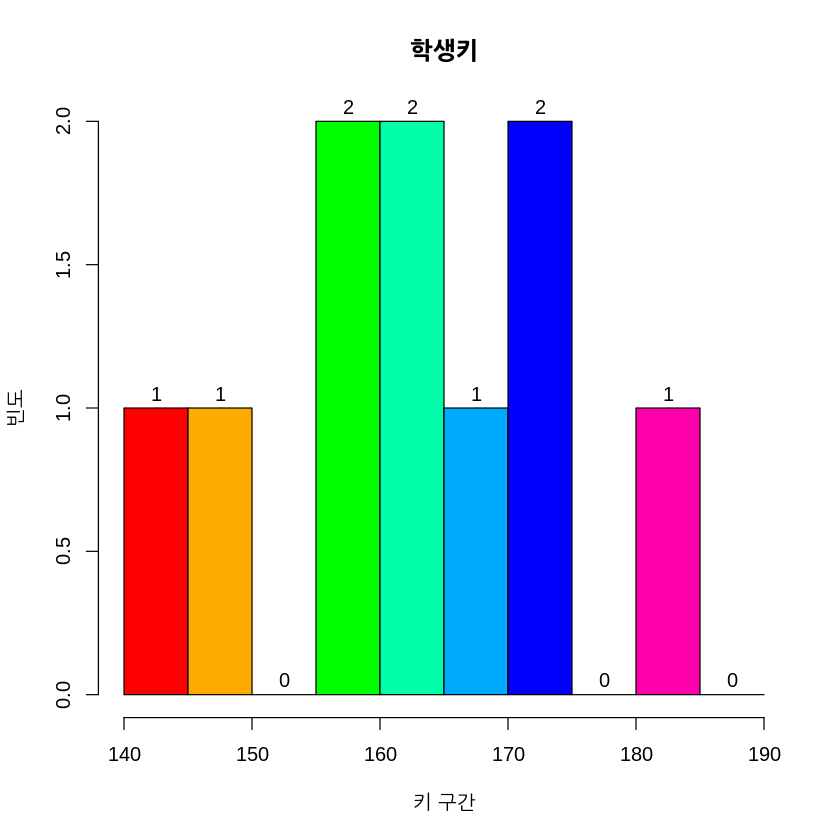

In [55]:
# 히스토그램에 빈도수 나타내기
h <-hist(heights, breaks=seq(140,190,5),
         main='학생키', xlab='키 구간', ylab='빈도',
         col=rainbow(9))
h
text(h$mids, h$counts + 0.05, lab=h$counts)

In [56]:
# 타이타닉 탑승객의 나이 분포 시각화
titanic <- read.csv('csv/titanic.csv', stringsAsFactors=F)

In [57]:
# 적절한 자료형으로 변환
titanic$pclass <- as.factor(titanic$pclass)
titanic$survived <- as.factor(titanic$survived)
titanic$name <- as.factor(titanic$name)
titanic$ticket <- as.factor(titanic$ticket)

In [58]:
str(titanic)

'data.frame':	1310 obs. of  11 variables:
 $ pclass  : Factor w/ 3 levels "1","2","3": 1 1 1 1 1 1 1 1 1 1 ...
 $ survived: Factor w/ 2 levels "0","1": 2 2 1 1 1 2 2 1 2 1 ...
 $ name    : Factor w/ 1308 levels "","Abbing, Mr. Anthony",..: 23 25 26 27 28 32 47 48 52 56 ...
 $ sex     : chr  "female" "male" "female" "male" ...
 $ age     : num  29 0.917 2 30 25 ...
 $ sibsp   : int  0 1 1 1 1 0 1 0 2 0 ...
 $ parch   : int  0 2 2 2 2 0 0 0 0 0 ...
 $ ticket  : Factor w/ 930 levels "","110152","110413",..: 189 51 51 51 51 126 94 17 78 827 ...
 $ fare    : num  211 152 152 152 152 ...
 $ cabin   : chr  "B5" "C22 C26" "C22 C26" "C22 C26" ...
 $ embarked: chr  "S" "S" "S" "S" ...


In [59]:
summary(titanic)

  pclass    survived                              name          sex           
 1   :323   0   :809   Connolly, Miss. Kate         :   2   Length:1310       
 2   :277   1   :500   Kelly, Mr. James             :   2   Class :character  
 3   :709   NA's:  1                                :   1   Mode  :character  
 NA's:  1              Abbing, Mr. Anthony          :   1                     
                       Abbott, Master. Eugene Joseph:   1                     
                       Abbott, Mr. Rossmore Edward  :   1                     
                       (Other)                      :1302                     
      age              sibsp            parch            ticket    
 Min.   : 0.1667   Min.   :0.0000   Min.   :0.000   CA. 2343:  11  
 1st Qu.:21.0000   1st Qu.:0.0000   1st Qu.:0.000   1601    :   8  
 Median :28.0000   Median :0.0000   Median :0.000   CA 2144 :   8  
 Mean   :29.8811   Mean   :0.4989   Mean   :0.385   3101295 :   7  
 3rd Qu.:39.0000   3rd Qu.:1

In [60]:
head(titanic)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
,<fct>,<fct>,<fct>,<chr>,<dbl>,<int>,<int>,<fct>,<dbl>,<chr>,<chr>
1,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S
2,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S
3,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S
4,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S
5,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S
6,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S


In [61]:
# 히스토그램 구간 수 계산
cuts = length(seq(0,80,5))
cuts

[1] 17

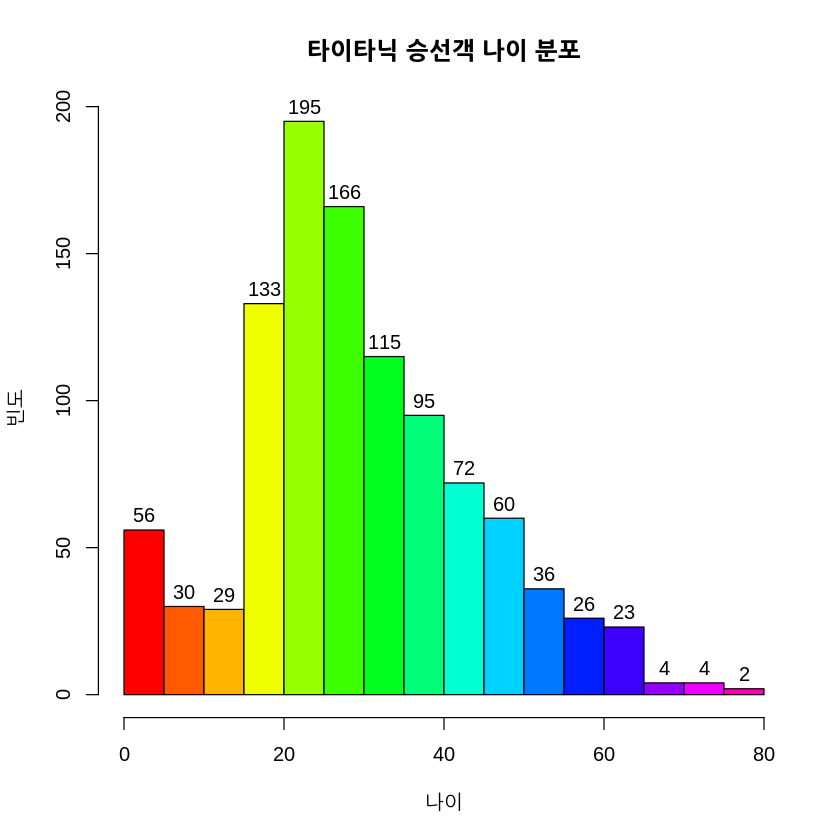

In [62]:
h <- hist(titanic$age, main='타이타닉 승선객 나이 분포',
          xlab='나이', ylab='빈도', col=rainbow(17))
text(h$mids, h$counts + 5, lab=h$counts)

In [63]:
age1 <- na.omit(titanic$age)

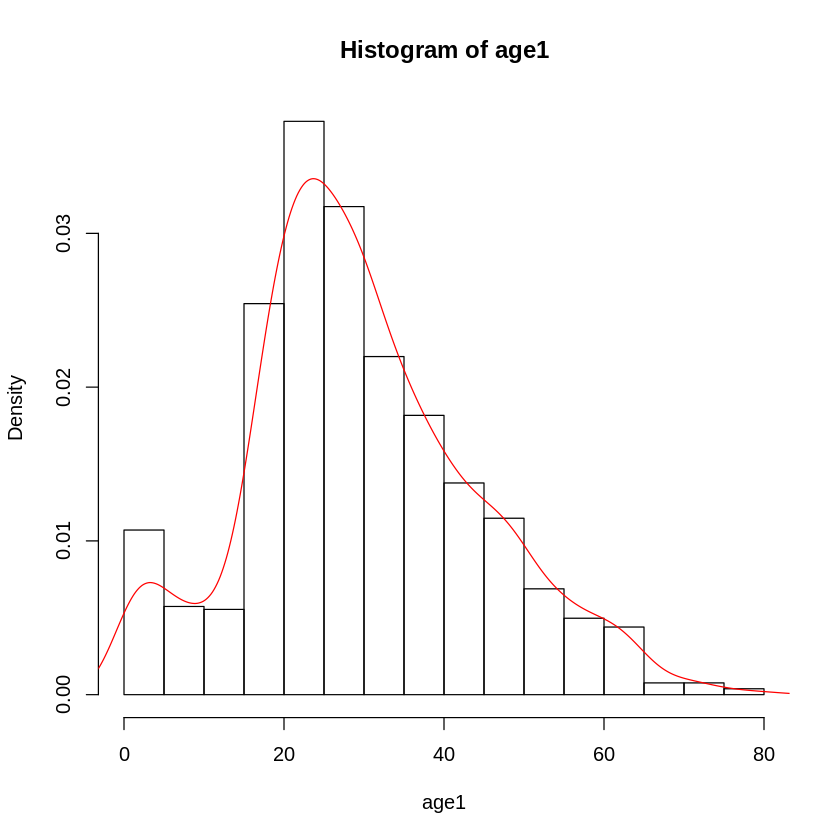

In [64]:
hist(age1, probability=T)
lines(density(age1), col='red')

In [66]:
# 참고!
# ggplot 패키지 설치
# jupyter의 터미널탭을 이용해서 설치할 것!
# install.packages('ggplot2')
library(ggplot2)

## tips 데이터셋
+ seaborn 내장 데이터셋
+ 손님들의 성별,흡연여부,요일별,시간별,손님수별 식사비용과 팁에 관련된 데이터

In [67]:
tips <- read.csv('http://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv')

In [68]:
# 식사규모 size를 범주형으로 변환
tips$size <- as.factor(tips$size)

In [69]:
str(tips)

'data.frame':	244 obs. of  7 variables:
 $ total_bill: num  17 10.3 21 23.7 24.6 ...
 $ tip       : num  1.01 1.66 3.5 3.31 3.61 4.71 2 3.12 1.96 3.23 ...
 $ sex       : Factor w/ 2 levels "Female","Male": 1 2 2 2 1 2 2 2 2 2 ...
 $ smoker    : Factor w/ 2 levels "No","Yes": 1 1 1 1 1 1 1 1 1 1 ...
 $ day       : Factor w/ 4 levels "Fri","Sat","Sun",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ time      : Factor w/ 2 levels "Dinner","Lunch": 1 1 1 1 1 1 1 1 1 1 ...
 $ size      : Factor w/ 6 levels "1","2","3","4",..: 2 3 3 2 4 4 2 4 2 2 ...


In [70]:
summary(tips)

   total_bill         tip             sex      smoker      day         time    
 Min.   : 3.07   Min.   : 1.000   Female: 87   No :151   Fri :19   Dinner:176  
 1st Qu.:13.35   1st Qu.: 2.000   Male  :157   Yes: 93   Sat :87   Lunch : 68  
 Median :17.80   Median : 2.900                          Sun :76               
 Mean   :19.79   Mean   : 2.998                          Thur:62               
 3rd Qu.:24.13   3rd Qu.: 3.562                                                
 Max.   :50.81   Max.   :10.000                                                
 size   
 1:  4  
 2:156  
 3: 38  
 4: 37  
 5:  5  
 6:  4  

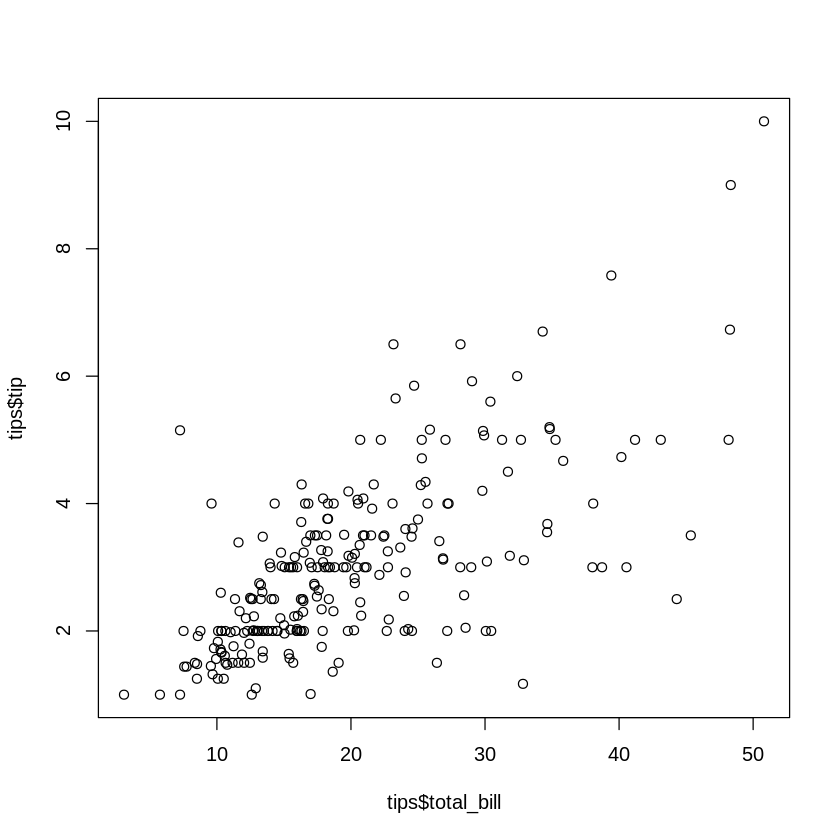

In [71]:
# 지불금액 대비 팁과의 관계
plot(tips$total_bill, tips$tip)

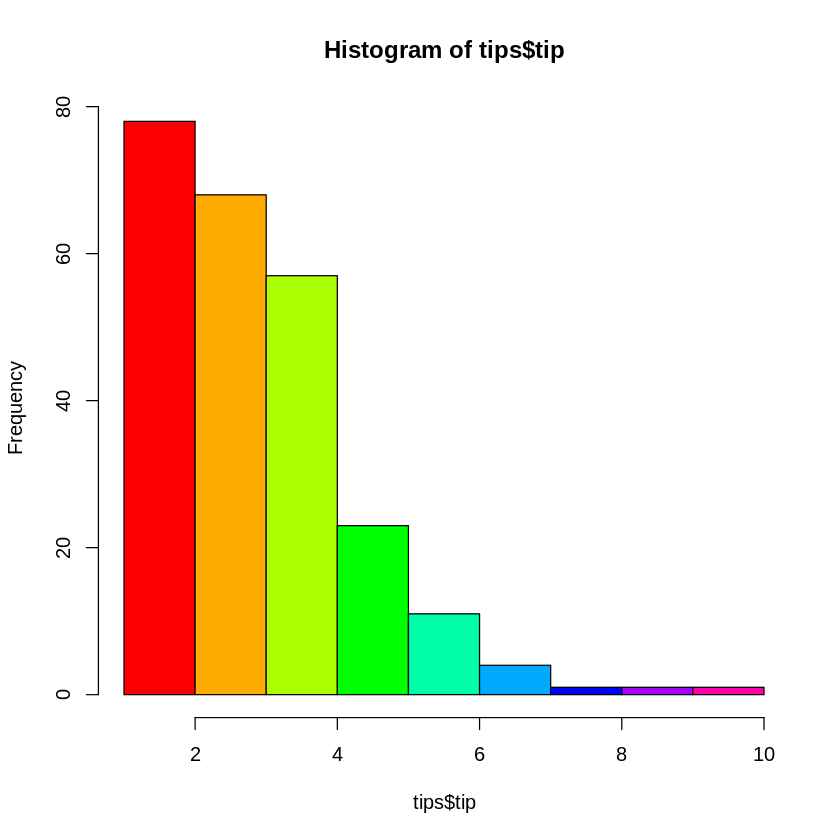

In [72]:
# 팁별 빈도 : 히스토그램
hist(tips$tip, col=rainbow(9))

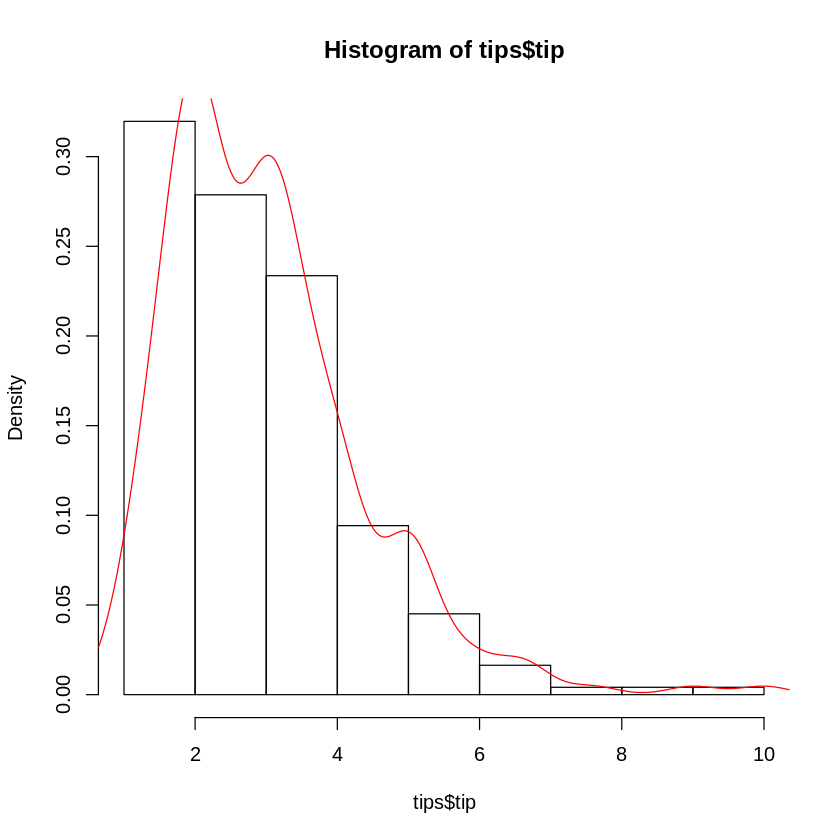

In [73]:
# 팁별 빈도 : KDE
hist(tips$tip, probability=T)
lines(density(tips$tip), col='red')

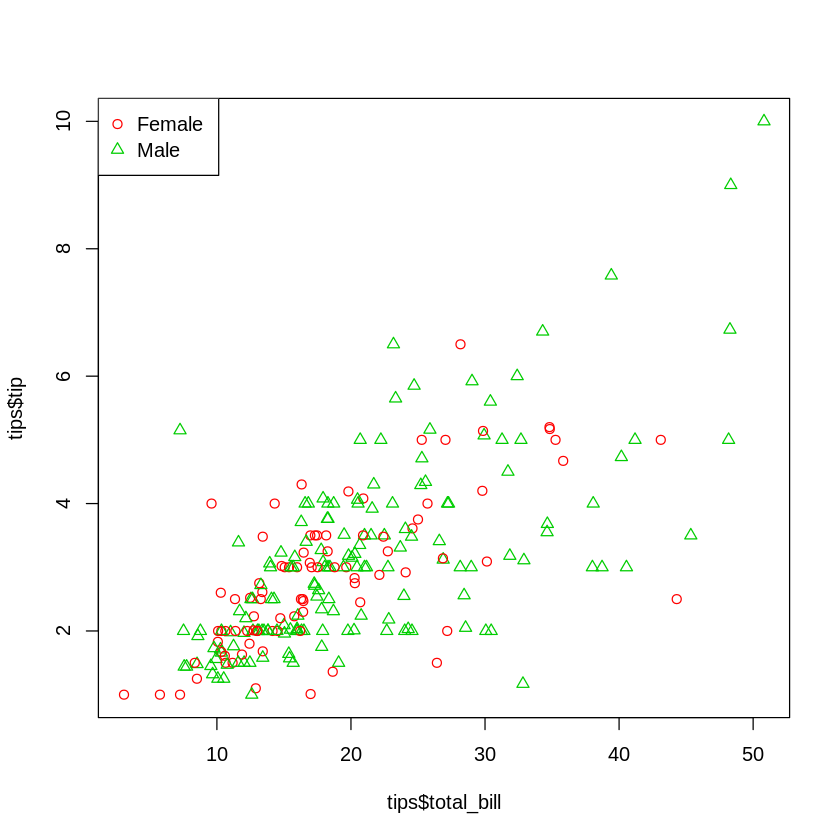

In [74]:
# 지불금액 대비 팁과의 관계 + 성별 : 산점도
gender <- as.integer(tips$sex)

plot(tips$total_bill, tips$tip,
    pch=gender, col=gender+1)

legend('topleft', levels(tips$sex),
      pch=unique(gender), col=unique(gender+1))

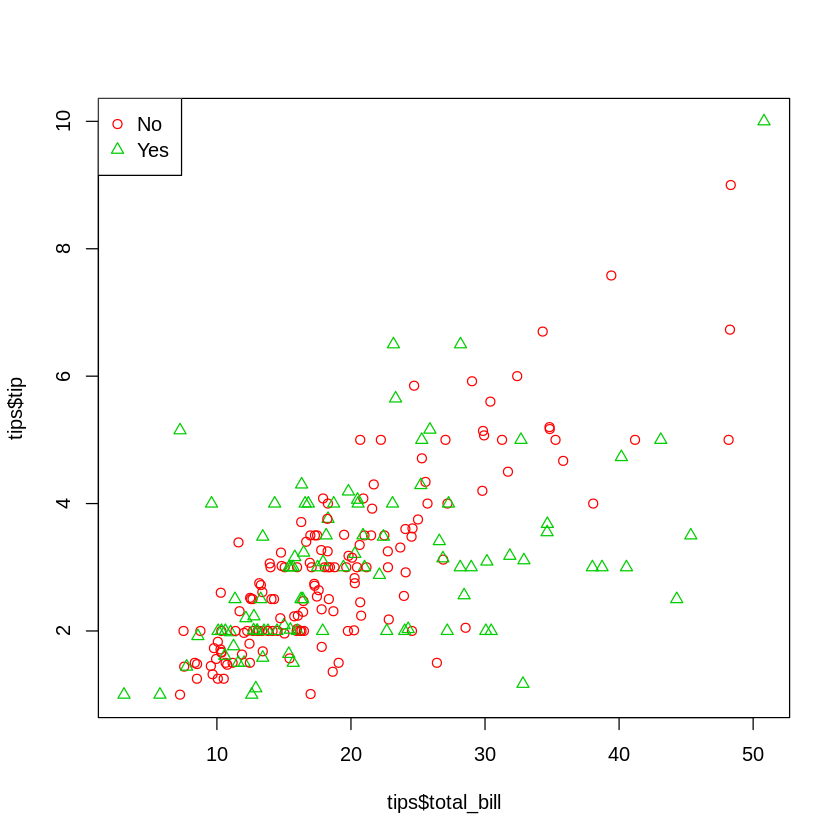

In [75]:
# 지불금액 대비 팁과의 관계 + 흡연여부 : 산점도
smoker <- as.integer(tips$smoker)

plot(tips$total_bill, tips$tip,
    pch=smoker, col=smoker+1)

legend('topleft', levels(tips$smoker),
      pch=unique(smoker), col=unique(smoker+1))

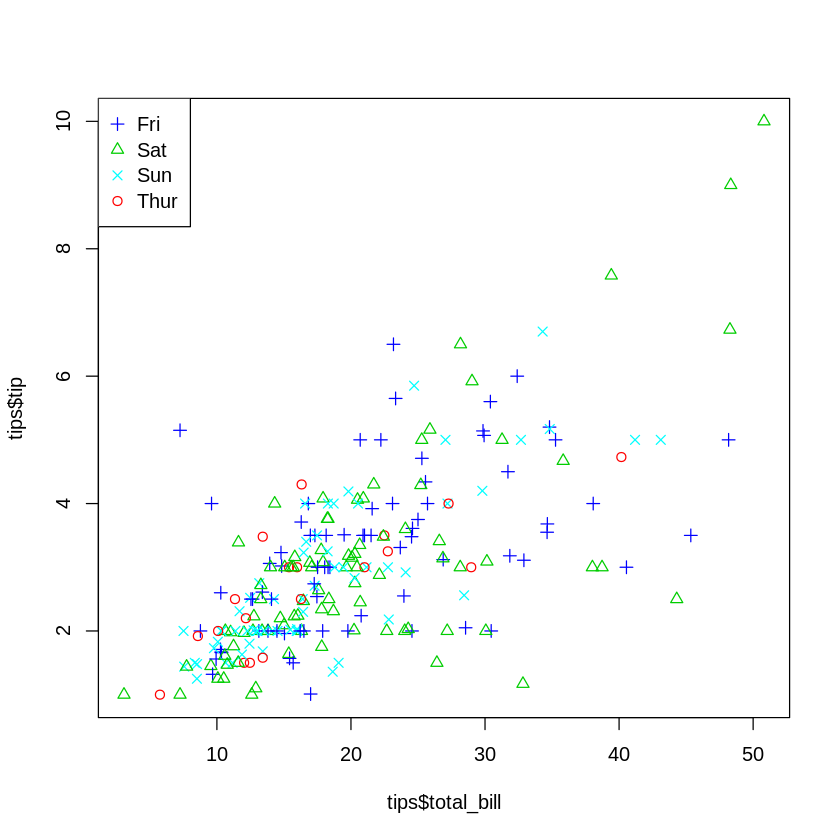

In [76]:
# 지불금액 대비 팁과의 관계 + 요일 : 산점도
day <- as.integer(tips$day)

plot(tips$total_bill, tips$tip,
    pch=day, col=day+1)

legend('topleft', levels(tips$day),
      pch=unique(day), col=unique(day+1))

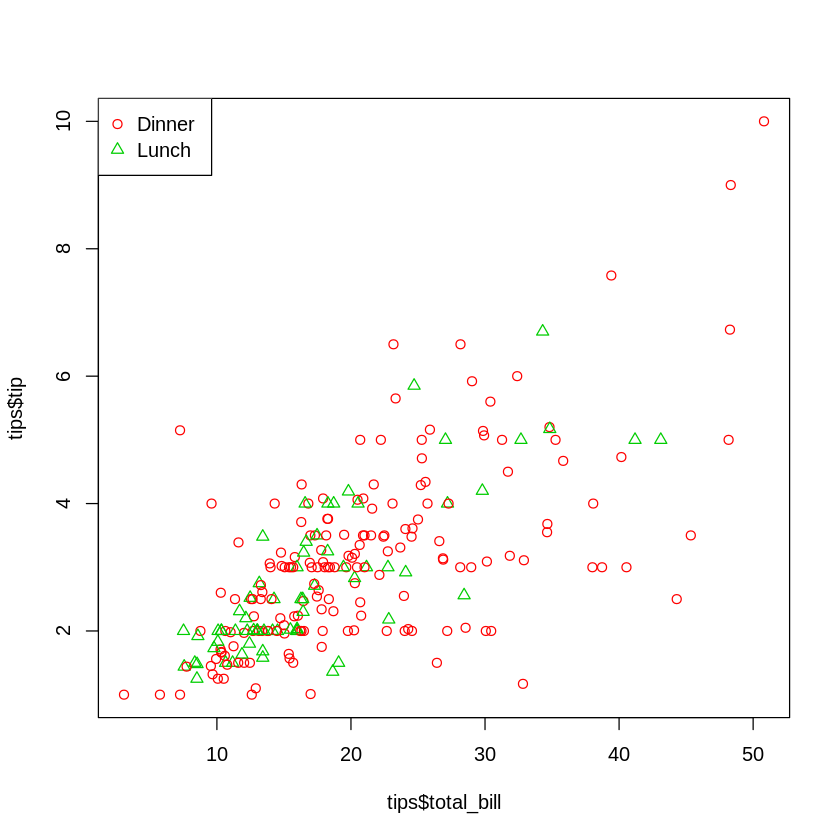

In [77]:
# 지불금액 대비 팁과의 관계 + 시간 : 산점도
time <- as.integer(tips$time)

plot(tips$total_bill, tips$tip,
    pch=time, col=time+1)

legend('topleft', levels(tips$time),
      pch=unique(time), col=unique(time+1))

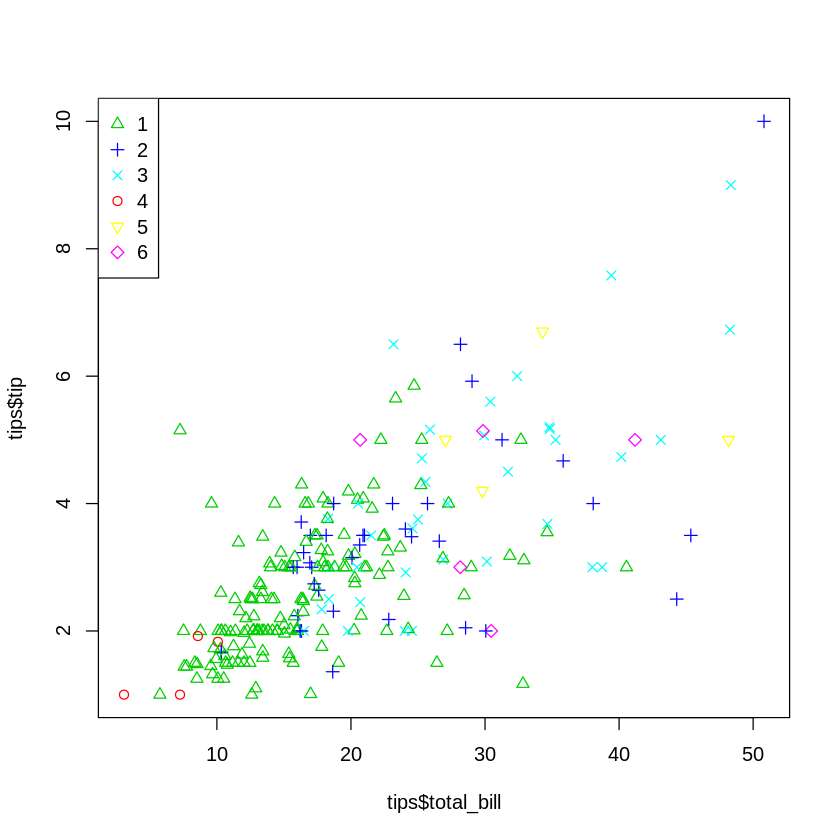

In [78]:
# 지불금액 대비 팁과의 관계 + 규모 : 산점도
size <- as.integer(tips$size)

plot(tips$total_bill, tips$tip,
    pch=size, col=size+1)

legend('topleft', levels(tips$size),
      pch=unique(size), col=unique(size+1))

## 작업한 데이터 저장하기
+ R에서 만든 객체(벡터, 데이터프레임)들은 메모리내에 생성
+ 따라서 프로그램이 종료하면 메모리내 객체들은 사라짐
+ 메모리내에 생성된 객체를 파일로 저장해둬야 함 - 직렬화
+ 파일 저장 : save(객체명, 저장경로)
+ 파일 읽기 : load(파일경로)

In [79]:
# 학생 10명의 키 데이터를 heights.rdata로 저장
save(heights, file='heights.rdata')

In [80]:
# 메모리내에 생성된 객체 확인 : ls
ls()

[1] "age1"    "bins"    "bmax"    "bmin"    "csfrq"   "cuts"    "day"    
 [8] "gender"  "h"       "height"  "heights" "kings"   "mdbins"  "mid"    
[15] "mn"      "mx"      "phone"   "range"   "relfrq"  "size"    "smoker" 
[22] "time"    "tips"    "titanic" "total"

In [81]:
# 메모리내에 생성된 객체 제거 : rm(대상)
rm(heights)

In [82]:
ls()

[1] "age1"    "bins"    "bmax"    "bmin"    "csfrq"   "cuts"    "day"    
 [8] "gender"  "h"       "height"  "kings"   "mdbins"  "mid"     "mn"     
[15] "mx"      "phone"   "range"   "relfrq"  "size"    "smoker"  "time"   
[22] "tips"    "titanic" "total"

In [83]:
# 파일에 저장된 heights객체를 메모리내로 불러들임
load('heights.rdata')

In [84]:
ls()     # heights 확인

[1] "age1"    "bins"    "bmax"    "bmin"    "csfrq"   "cuts"    "day"    
 [8] "gender"  "h"       "height"  "heights" "kings"   "mdbins"  "mid"    
[15] "mn"      "mx"      "phone"   "range"   "relfrq"  "size"    "smoker" 
[22] "time"    "tips"    "titanic" "total"